# MAT555E Final Project

# Murat Teksin 504211325

The aim of this project is make a classification of the hand gestures with collected data by 24 piece of EMG sensors. EMG sensors were placed forearm of participants and it is asked them to some specific hand gestures. In this application we focused 3 gestures. Fist, flexion and extension. 

Kaczmarek, P.; Mańkowski, T.; Tomczyński, J. putEMG—A Surface Electromyography Hand Gesture Recognition Dataset. Sensors 2019, 19, 3548. 
 
@article{putEMGKaczmarek2019,
	author = {Kaczmarek, Piotr and Mańkowski, Tomasz and Tomczyński, Jakub},
	title = {putEMG—A Surface Electromyography Hand Gesture Recognition Dataset},
	journal = {Sensors},
	volume = {19},
	year = {2019},
	number = {16},
	article-number = {3548},
	url = {https://www.mdpi.com/1424-8220/19/16/3548},
	issn = {1424-8220},
	doi = {10.3390/s19163548}
}

In [87]:
display(HTML("<table><tr><td><img src='1_fist.jpg'></td><td><img src='2_flexion.jpg'></td><td><img src='3_extension.jpg'></td></tr></table>"))

,,


In [82]:
import pandas as pd        # for dataframes and csv files
import numpy as np         # for array operations
import matplotlib.pyplot as plt   # for display operations
from sklearn.model_selection import train_test_split   # for train and test set division for learning and test parts
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # for evaluation of the models
import tensorflow as tf    # for deep learning operations
import keras as ks         # also for deep learning operations
from keras.models import Sequential # to construct artificial neural network model 
from keras.layers import Dense   # to construct artificial neural network model
from keras.utils import to_categorical  # to make simplier to process
from sklearn.decomposition import PCA  # to make a dimentional reduction
import os   # for folder operations
from sklearn.neighbors import KNeighborsClassifier   # for KNN 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # for LDA
from IPython.display import HTML, display # for embed picture


First, one of the participant's datas is imported to see features.

In [5]:
df = pd.read_csv(r'Data/emg_gestures-03-sequential-2018-05-11-11-10-50-475.csv')

Data has 29 columns. First column is timestamps, latter 24 columns are stand for EMG sensors. TRAJ_1 filtered data labels and the TRAJ_GT the final labels. There is no missing data in all datas. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348096 entries, 0 to 1348095
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1348096 non-null  float64
 1   EMG_1              1348096 non-null  float64
 2   EMG_2              1348096 non-null  float64
 3   EMG_3              1348096 non-null  float64
 4   EMG_4              1348096 non-null  float64
 5   EMG_5              1348096 non-null  float64
 6   EMG_6              1348096 non-null  float64
 7   EMG_7              1348096 non-null  float64
 8   EMG_8              1348096 non-null  float64
 9   EMG_9              1348096 non-null  float64
 10  EMG_10             1348096 non-null  float64
 11  EMG_11             1348096 non-null  float64
 12  EMG_12             1348096 non-null  float64
 13  EMG_13             1348096 non-null  float64
 14  EMG_14             1348096 non-null  float64
 15  EMG_15             1348096 non-n

In application only sensors values and the TRAJ_GT columns is used.

In [7]:
df = df.rename(columns = {'TRAJ_1':'HG'})
df['HG'] = df['TRAJ_GT']
df_res1 = pd.DataFrame(df.loc[df['HG'] == 1].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
df_res2 = pd.DataFrame(df.loc[df['HG'] == 2].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
df_res3 = pd.DataFrame(df.loc[df['HG'] == 3].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
df_last = pd.concat([df_res1,df_res2,df_res3])
df_last.head()

,Unnamed: 0,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,...,EMG_16,EMG_17,EMG_18,EMG_19,EMG_20,EMG_21,EMG_22,EMG_23,EMG_24,HG
0,8.326100,148.0,2.0,-5.0,-8.0,-11.0,-51.0,-25.0,16.0,51.0,...,56.0,-8.0,21.0,-24.0,8.0,6.0,-4.0,8.0,-12.0,1.0
1,8.326296,133.0,-6.0,-7.0,-8.0,-10.0,-48.0,-21.0,21.0,32.0,...,55.0,-23.0,15.0,-31.0,3.0,3.0,-6.0,1.0,-28.0,1.0
2,8.326491,119.0,-12.0,-8.0,-6.0,-5.0,-41.0,-14.0,26.0,17.0,...,56.0,-34.0,12.0,-35.0,3.0,3.0,-8.0,-6.0,-43.0,1.0
3,8.326686,103.0,-17.0,-4.0,0.0,2.0,-33.0,-7.0,29.0,4.0,...,54.0,-47.0,7.0,-37.0,3.0,4.0,-11.0,-14.0,-60.0,1.0
4,8.326881,87.0,-17.0,1.0,6.0,10.0,-24.0,-1.0,31.0,-9.0,...,47.0,-60.0,2.0,-38.0,4.0,7.0,-10.0,-21.0,-73.0,1.0


Below, two plots from different sensors can be observed. 3 labels appears in 3 different colors. Blue stands for 'fist' while orange stands for 'flexion' and green is 'extension'.

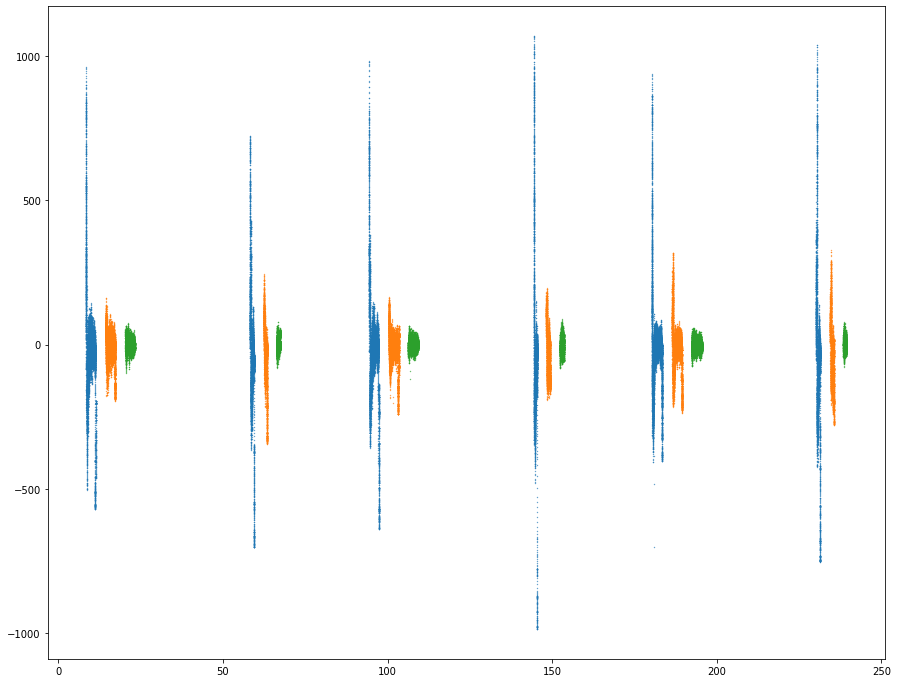

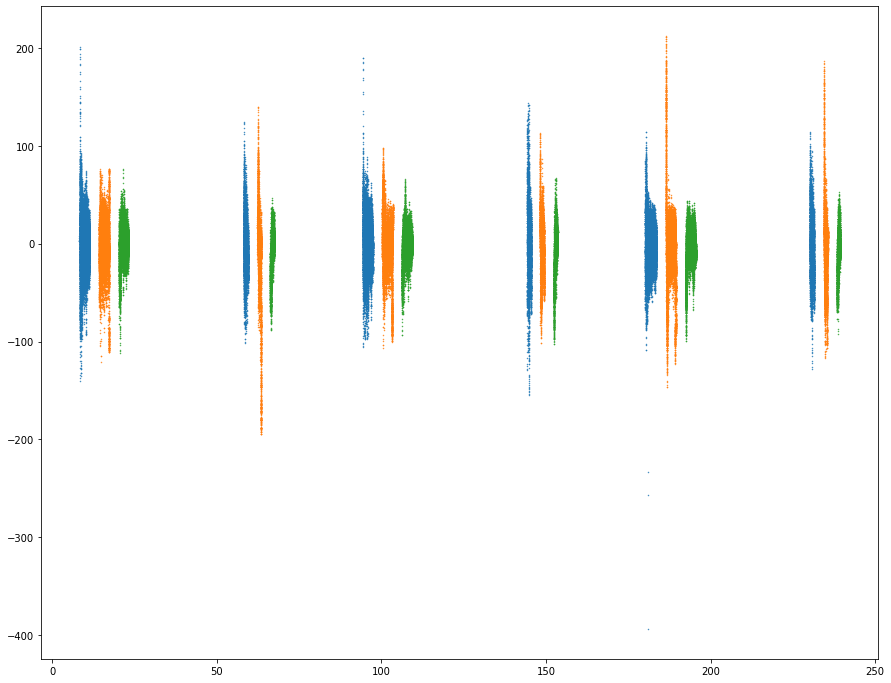

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
for i in (df_last['HG'].unique()):
    plt.scatter(df_last.loc[df_last['HG'] == i, 'Unnamed: 0'].values,df_last.loc[df_last['HG'] == i, 'EMG_1'].values,s=0.1)
plt.figure(figsize=(15,12))
for i in (df_last['HG'].unique()):
    plt.scatter(df_last.loc[df_last['HG'] == i, 'Unnamed: 0'].values,df_last.loc[df_last['HG'] == i, 'EMG_20'].values,s=0.2)

With zoom to a spesific time interval, a muscle activity can be seen below.

(58, 60)

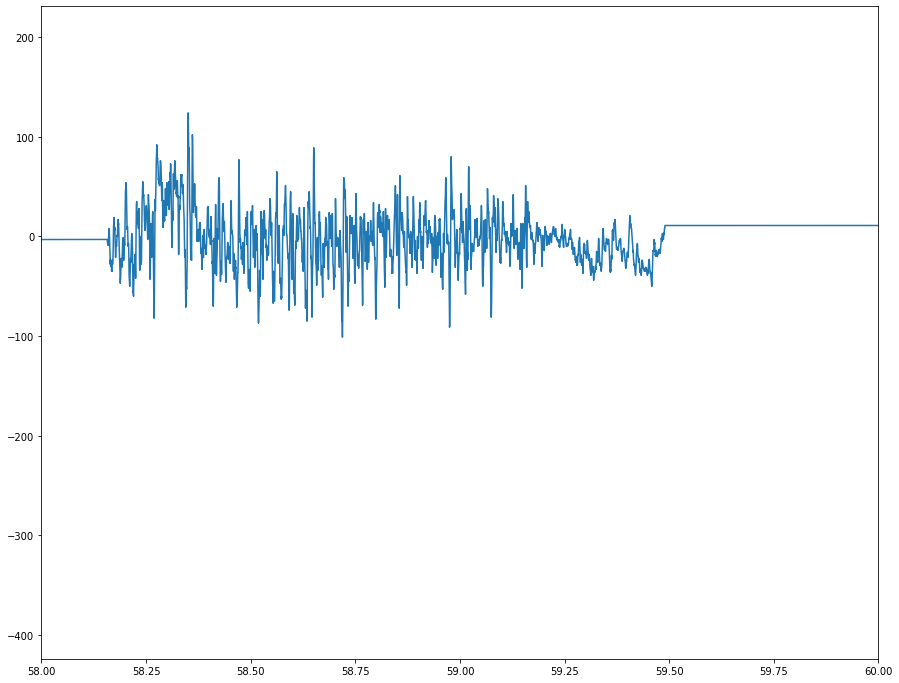

In [12]:
plt.figure(figsize=(15,12))
plt.plot(df.loc[df['TRAJ_GT'] == 1, 'Unnamed: 0'].values,df.loc[df['TRAJ_GT'] == 1, 'EMG_20'].values) 
plt.xlim([58, 60])

After some displays with data, correlation between sensor datas can be seen below. Sensor 9 and 6 have low correlation wirh other sensors, respectively. But in application all sensors' datas are used.

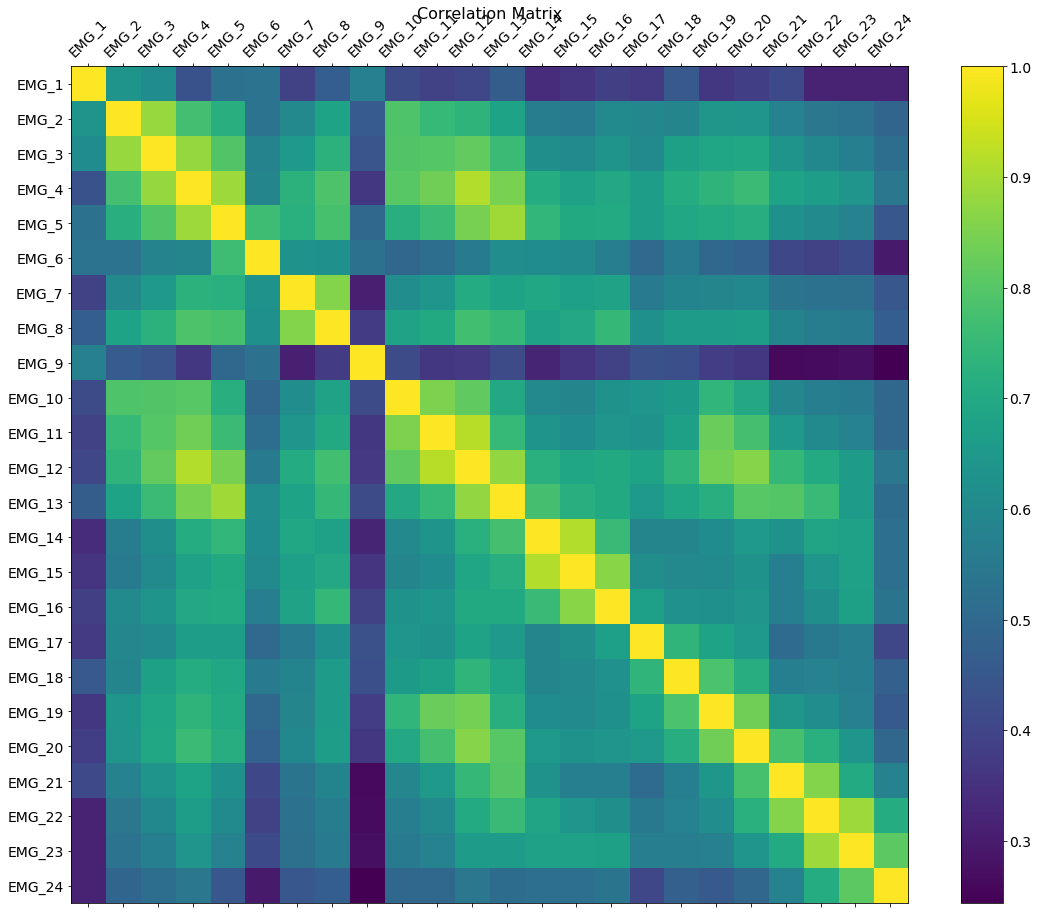

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.iloc[:,1:25].corr(), fignum=f.number)
plt.xticks(range(df.iloc[:,1:25].select_dtypes(['number']).shape[1]), df.iloc[:,1:25].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.iloc[:,1:25].select_dtypes(['number']).shape[1]), df.iloc[:,1:25].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

After correlation, it is tried to see, if 24 sensors' datas are applied dimentional reduction from 24 to 2. In that case datas can't be seperated each other. 

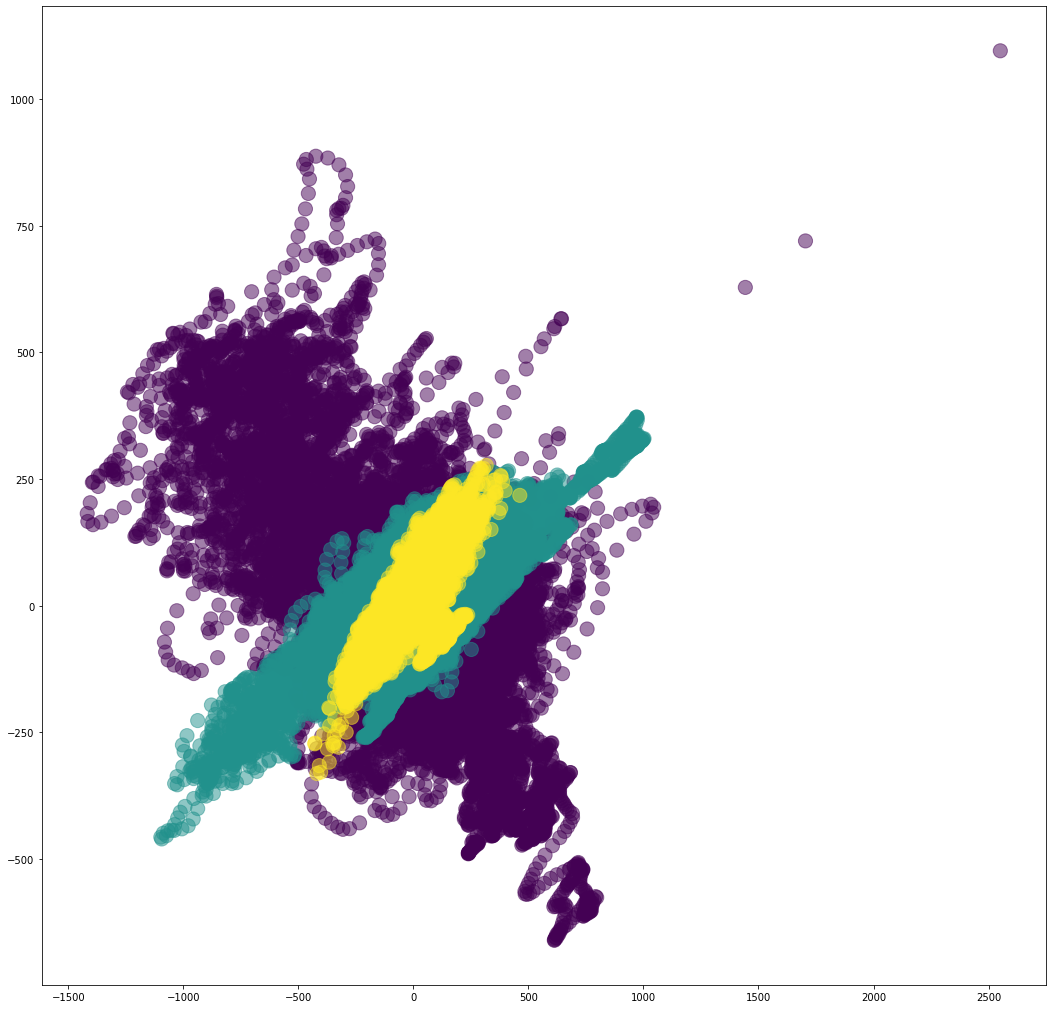

In [19]:
model = PCA(n_components=2)
data = model.fit_transform(df_last.iloc[:,1:25])
plt.figure(figsize=(18,18))
plt.scatter(data[:,0],data[:,1],c=df_last['HG'], s=200, alpha=0.5)

After these observations datas from all users collected and saved with editing.

In [11]:
import os
import pandas as pd

# 1. defines path to csv files
path = 'Data/'

# 2. creates list with files to merge based on name convention
file_list = [path + f for f in os.listdir(path) if f.startswith('emg')]

# 3. creates empty list to include the content of each file converted to pandas DF
csv_list = []
 
# 4. reads each (sorted) file in file_list, converts it to pandas DF and appends it to the csv_list
for file in sorted(file_list):
    df = df.rename(columns = {'TRAJ_1':'HG'})
    df['HG'] = df['TRAJ_GT']
    df_res1 = pd.DataFrame(df.loc[df['HG'] == 1].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
    df_res2 = pd.DataFrame(df.loc[df['HG'] == 2].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
    df_res3 = pd.DataFrame(df.loc[df['HG'] == 3].iloc[:,:26].values ,columns = df.iloc[:,:26].columns)
    df_last = pd.concat([df_res1,df_res2,df_res3])
    df_last.head()
    csv_list.append(df_last)

# 5. merges single pandas DFs into a single DF, index is refreshed 
csv_merged = pd.concat(csv_list, ignore_index=True)

# 6. Single DF is saved to the path in CSV format, without index column
csv_merged.to_csv(path + 'EMG2.csv', index=False)

All datas are imported to notebook environment.

In [23]:
dff = pd.read_csv('Data/EMG.csv')

In [24]:
dff.head()

,Unnamed: 0,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,...,EMG_16,EMG_17,EMG_18,EMG_19,EMG_20,EMG_21,EMG_22,EMG_23,EMG_24,HG
0,8.326100,148.0,2.0,-5.0,-8.0,-11.0,-51.0,-25.0,16.0,51.0,...,56.0,-8.0,21.0,-24.0,8.0,6.0,-4.0,8.0,-12.0,1.0
1,8.326296,133.0,-6.0,-7.0,-8.0,-10.0,-48.0,-21.0,21.0,32.0,...,55.0,-23.0,15.0,-31.0,3.0,3.0,-6.0,1.0,-28.0,1.0
2,8.326491,119.0,-12.0,-8.0,-6.0,-5.0,-41.0,-14.0,26.0,17.0,...,56.0,-34.0,12.0,-35.0,3.0,3.0,-8.0,-6.0,-43.0,1.0
3,8.326686,103.0,-17.0,-4.0,0.0,2.0,-33.0,-7.0,29.0,4.0,...,54.0,-47.0,7.0,-37.0,3.0,4.0,-11.0,-14.0,-60.0,1.0
4,8.326881,87.0,-17.0,1.0,6.0,10.0,-24.0,-1.0,31.0,-9.0,...,47.0,-60.0,2.0,-38.0,4.0,7.0,-10.0,-21.0,-73.0,1.0


In [26]:
print('The total data size is: ',dff.size)

The total data size is:  6388694


The datas from different labels are plotted below.

<Figure size 1080x864 with 0 Axes>

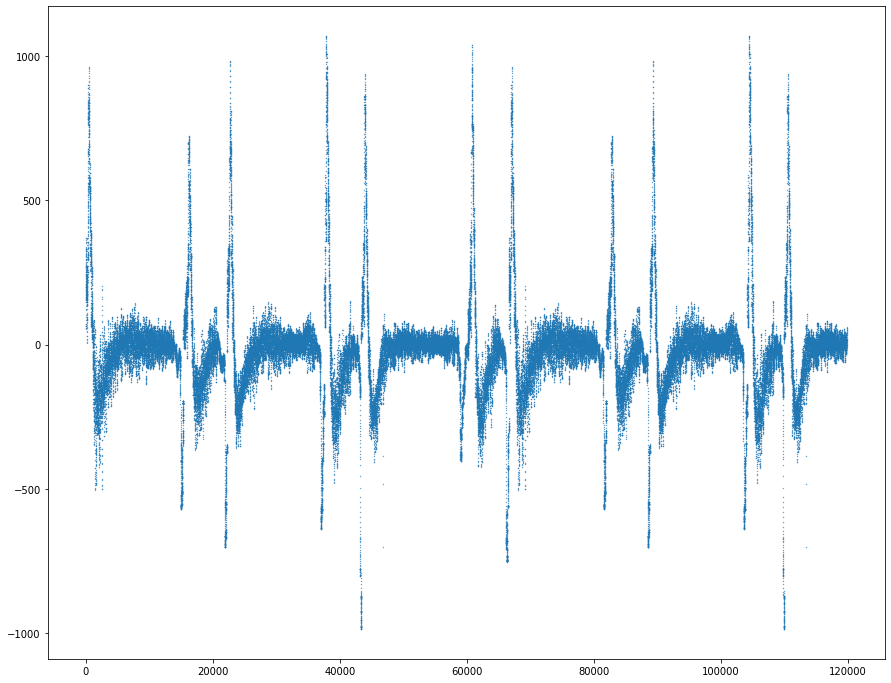

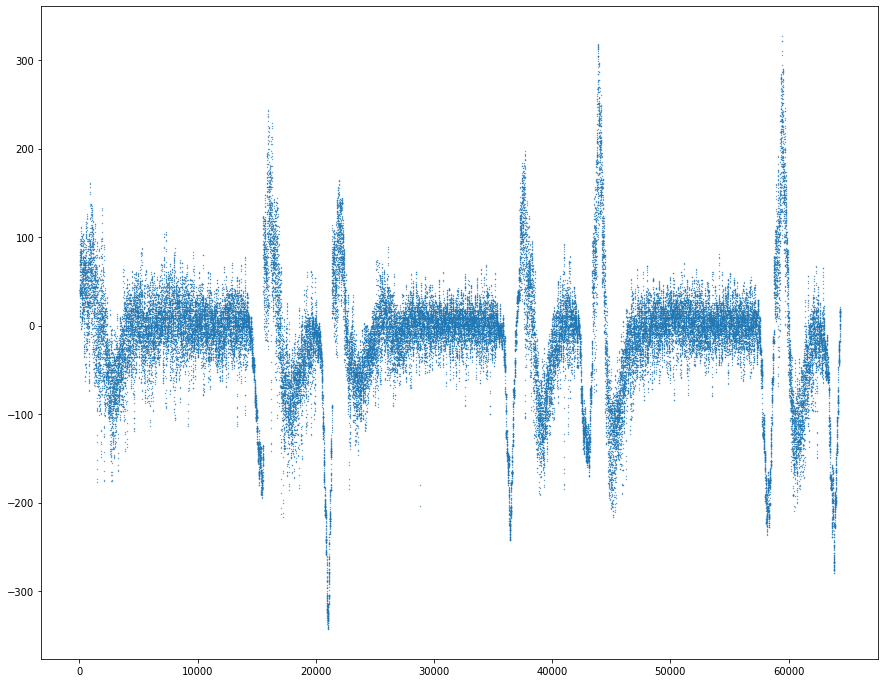

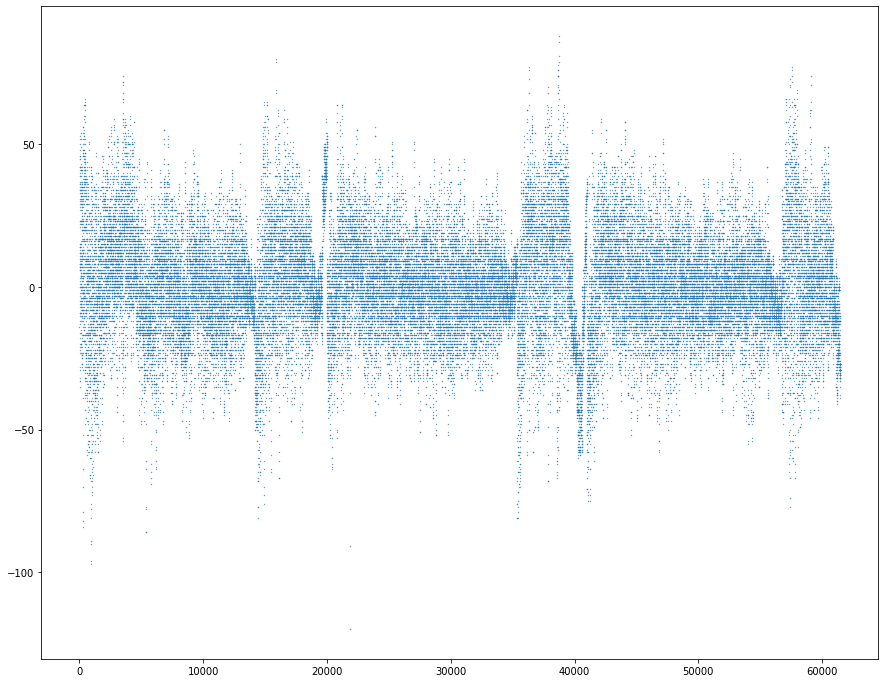

In [27]:
plt.figure(figsize=(15,12))
for i in (df_last['HG'].unique()):
    plt.figure(figsize=(15,12))
    plt.scatter(np.arange(len(dff.loc[dff['HG'] == i, 'EMG_1'].values)),dff.loc[dff['HG'] == i, 'EMG_1'].values,s=0.1)

#  Train Test Split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(dff.iloc[:,1:25].values, dff.iloc[:,-1].values,test_size=0.2,random_state=42)

#  LDA

Firstly, Linear Discriminan Analysis is applied.

In [38]:
classifier_lda = LinearDiscriminantAnalysis()
classifier_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [39]:
prediction_lda = classifier_lda.predict(x_test)

              precision    recall  f1-score   support

         1.0       0.52      0.91      0.66     23914
         2.0       0.50      0.12      0.19     12871
         3.0       0.56      0.18      0.28     12359

    accuracy                           0.52     49144
   macro avg       0.53      0.41      0.38     49144
weighted avg       0.52      0.52      0.44     49144



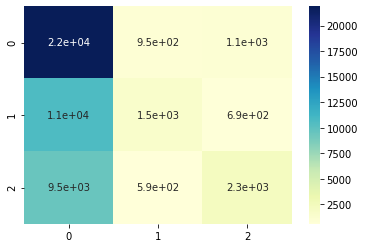

In [40]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prediction_lda),annot=True,cmap='YlGnBu')
print(classification_report(y_test, prediction_lda))

LDA doesn't gives the high accuracy for this problem.

# KNN 

Secondly, KNN Classifier is applied.

In [32]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
prediction_knn = KNN.predict(x_test)

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     23914
         2.0       0.99      0.97      0.98     12871
         3.0       1.00      0.99      0.99     12359

    accuracy                           0.99     49144
   macro avg       0.99      0.99      0.99     49144
weighted avg       0.99      0.99      0.99     49144



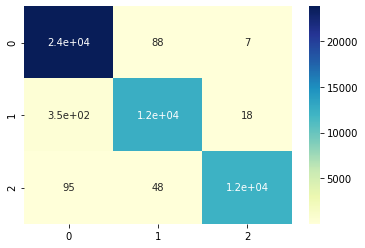

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prediction_knn),annot=True,cmap='YlGnBu')
print(classification_report(y_test, prediction_knn))

KNN gives higher accuracy on this problem. It can be seen in the confussion matrix above.

# ANN 

Thirdly, an ANN model is constructed. For ann model outputs, labels diveded 3 rows with to_categorical function.

In [45]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [62]:
model = Sequential()
model.add(Dense(24,activation='relu'))  # input layer has same amount neurons with input lenght.
model.add(Dense(10,activation='relu'))  # Hidden layer has 10 neurons
model.add(Dense(10,activation='relu'))  # Hidden layer has 10 neurons
model.add(Dense(4,activation='softmax'))   # Out layer has 3 neurons and sooftmax activation because of the problem is multi class problem.
model.compile(optimizer='adam',loss='categorical_crossentropy')   # model is constructed with adam optimizer and multiclass loss function.

In [63]:
model.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Train on 196575 samples, validate on 49144 samples
Epoch 1/20
196575/196575 [==============================] - 7s 38us/step - loss: 0.4789 - val_loss: 0.2205
Epoch 2/20
196575/196575 [==============================] - 7s 38us/step - loss: 0.1776 - val_loss: 0.1695
Epoch 3/20
196575/196575 [==============================] - 7s 36us/step - loss: 0.1355 - val_loss: 0.1186
Epoch 4/20
196575/196575 [==============================] - 7s 37us/step - loss: 0.1171 - val_loss: 0.1135
Epoch 5/20
196575/196575 [==============================] - 7s 36us/step - loss: 0.1071 - val_loss: 0.1048
Epoch 6/20
196575/196575 [==============================] - 7s 38us/step - loss: 0.0979 - val_loss: 0.1020
Epoch 7/20
196575/196575 [==============================] - 7s 37us/step - loss: 0.0936 - val_loss: 0.0891
Epoch 8/20
196575/196575 [==============================] - 7s 37us/step - loss: 0.0900 - val_loss: 0.0914
Epoch 9/20
196575/196575 [==============================] - 7s 37us/step - loss: 0.0865 - val

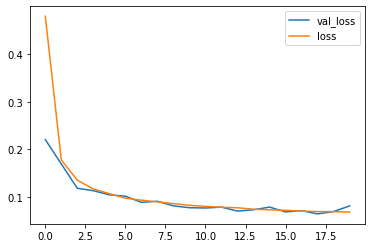

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

It can be observed loss going down with epochs. 

In [66]:
ann_predictions = model.predict_classes(x_test)

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97     23914
         2.0       0.95      0.96      0.95     12871
         3.0       0.98      0.99      0.98     12359

    accuracy                           0.97     49144
   macro avg       0.97      0.97      0.97     49144
weighted avg       0.97      0.97      0.97     49144



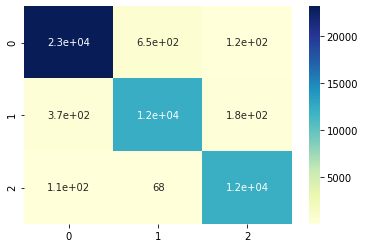

In [70]:
print(classification_report(y_test,ann_predictions))
sns.heatmap(confusion_matrix(y_test,ann_predictions),annot=True,cmap='YlGnBu')

ANN model also gives high accuracy for test set for this data.